<a href="https://colab.research.google.com/github/mkrajevsky/NLP_guzman/blob/main/Micha%C5%82_Krajewski_02_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\textbf{Linear Regression}$
---

$\textbf{Import libraries}$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


$\textbf{Least squares method}$

In [ ]:
def least_squares(data):
    # mean for x and y values
    Xs = [p[0] for p in data]
    Ys = [p[1] for p in data]
    mx = np.mean(Xs)
    my = np.mean(Ys)
    # sum
    sumx2 = sum([(x - mx)**2 for x in Xs])
    sumxy = sum([(x - mx)*(y - my) for x,y in data])
    # slope and interceptor
    m = sumxy/sumx2
    b = my - m*mx

    return [m, b]

$\textbf{The linear regression} \color{blue}{\textbf{ class}}$

In [ ]:
class Linear_Regression:
    def __init__(self, data):
        self.data = data
        self.N = len(data)
        self.results = []
        self.mse_s = []
    def __compute_derivatives(self, m, b):
        dm = sum([-2 * x * (y - (m * x + b)) for x,y in self.data])/self.N # derivative wrt to m
        db = sum([-2 * (y - (m * x + b)) for x,y in self.data])/self.N # derivative wrt to b
        return dm, db

    def fit(self, epochs, LR, m=0, b=0):
        self.mse_s += [self.__mse(m,b)]
        for i in range(epochs):
            # get derivatives
            dm, db = self.__compute_derivatives(m, b)
            # update learning parameters (slope and interceptor)
            m -= dm*LR
            b -= db*LR
            self.mse_s+= [self.__mse(m,b)]
        self.results = [m, b]
        return self.results

    def plot_result(self):
        # split data into 2 lists: 'x' points and 'y' points
        Xs = [p[0] for p in self.data]
        Ys = [p[1] for p in self.data]
        # get slope and interceptor (final) values
        m = self.results[0]
        b = self.results[1]
        # set the values for plotting
        x = np.arange(min(Xs)-3, max(Xs)+3)
        y = m * x + b # line
        plt.plot(x, y, label='model') # regression line
        plt.scatter(Xs, Ys, c='r', label='data points') # data points
        plt.legend()
        plt.show()

    def __mse(self,m,b):
      calc_dist = lambda x : (x[1]-m*x[0]+b)**2
      return sum([calc_dist(p) for p in self.data])/self.N

    def plot_error(self):
        epochs  = [i for i in range(len(self.mse_s))]
        plt.scatter(epochs, self.mse_s , c='r', label='MSE', alpha = 0.4) # data points
        plt.legend()
        plt.show()

$\color{red} {\textbf{Dataset}}$

In [ ]:
dataset1 = [(1,2), (2,4), (3,5), (4,4), (5,5)]

$\text{First, we check the least squares method}$

In [ ]:
least_squares(dataset1)

[0.6, 2.2]

$\textbf{Main Program}$

In [ ]:
# Define parameters
epochs = 10 # number of iterations
LR = 0.08 # Learning Rate

# Create an instance
reg1 = Linear_Regression(dataset1)

# Fit dataset and print results
reg1.fit(epochs, LR)

[0.6356963874842532, 0.6638292564783546]

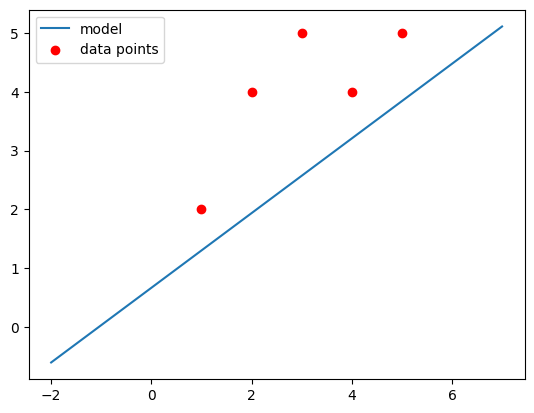

In [ ]:
reg1.plot_result()

In [ ]:
dataset2 = [(1.1, 39343.0), (1.3, 46205.0), (1.5, 37731.0),
            (2.0, 43525.0), (2.2, 39891.0), (2.9, 56642.0),
            (3.0, 60150.0), (3.2, 54445.0), (3.2, 64445.0),
            (3.7, 57189.0), (3.9, 63218.0), (4.0, 55794.0),
            (4.0, 56957.0), (4.1, 57081.0), (4.5, 61111.0),
            (4.9, 67938.0), (5.1, 66029.0), (5.3, 83088.0),
            (5.9, 81363.0), (6.0, 93940.0), (6.8, 91738.0),
            (7.1, 98273.0), (7.9, 101302.0), (8.2, 113812.0),
            (8.7, 109431.0), (9.0, 105582.0), (9.5, 116969.0),
            (9.6, 112635.0), (10.3, 122391.0), (10.5, 121872.0)]

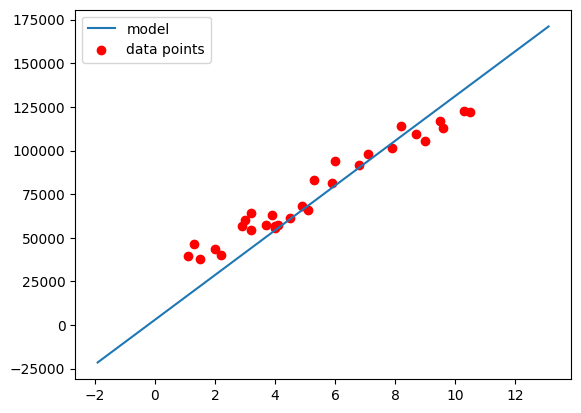

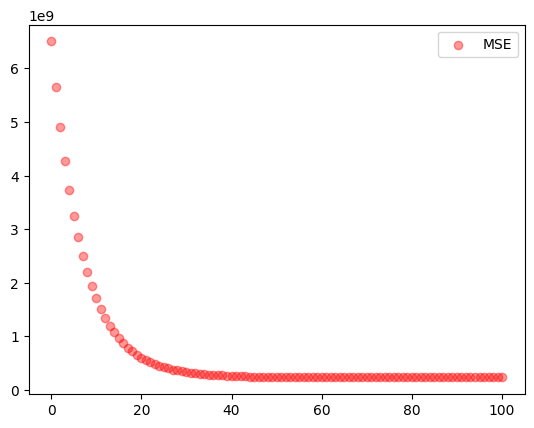

In [ ]:
reg2 = Linear_Regression(dataset2)
reg2.fit(epochs=100, LR=0.001)
reg2.plot_result()
reg2.plot_error()

#$\color{green}{\textbf{Exercise 2}}$
---

1.  Modify the $\text{linear regression } \color{blue} {\text{class}}$ and add following function
```
def __mse(self, m, b):
        # your code here
        return mse
```
that returns the $\color{red} {\text{mean square error}}$ for given values of $m$ and $b$, using the $\textit{data}$ from the $\color{blue} {\text{class}}$

2. Modify the $\textit{fit}$ method such that it also computes and saves a list of all mean square errors for every epoch.

    ($\textbf{Note:}$ it should start with the $\textit{initial/default}$ values for $m$ and $b$).

3. Plot the errors in a (different) graph such that the x-axis represents the $\textit{epochs}$ and the y-axis the $\textit{MSE}$.
```
def plot_error(self):
        plt.plot(<list of errors>)
```
4. Run the experiment again (with the above features implemented) using the following dataset $\color{green} {\text{(Years of Experience, Salary)}}$:
```
dataset2 = [(1.1, 39343.0), (1.3, 46205.0), (1.5, 37731.0),
               (2.0, 43525.0), (2.2, 39891.0), (2.9, 56642.0),
               (3.0, 60150.0), (3.2, 54445.0), (3.2, 64445.0),
               (3.7, 57189.0), (3.9, 63218.0), (4.0, 55794.0),
               (4.0, 56957.0), (4.1, 57081.0), (4.5, 61111.0),
               (4.9, 67938.0), (5.1, 66029.0), (5.3, 83088.0),
               (5.9, 81363.0), (6.0, 93940.0), (6.8, 91738.0),
               (7.1, 98273.0), (7.9, 101302.0), (8.2, 113812.0),
               (8.7, 109431.0), (9.0, 105582.0), (9.5, 116969.0),
               (9.6, 112635.0), (10.3, 122391.0), (10.5, 121872.0)]
```
For which values of $\textit{epochs}$ and $\textit{LR}$ does the algorithm find a line that best fits the data?
```
reg2 = Linear_Regression(dataset2)
reg2.fit(epochs=?, LR=?)
reg2.plot_result()
reg2.plot_error()
```